In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs=zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list, 
coordinates = list(lats_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-56.33578984346968 36.018170458788546
-6.718455511414675 -173.45208301526054
43.35967134098226 39.81304418571224
36.45959328480461 16.75512749283925
30.753620300606713 -30.22464619780783
-31.673954026715307 -0.649667335713275
69.49384353960824 -77.18389607284317
3.1040190342467326 -95.78171114591377
-71.64279289154432 -102.67247742794822
-53.75485997473984 -66.0894533341018
84.7542930396915 37.76603673179099
10.0165055249593 -143.02666044847768
35.936414427185994 -3.194886410365797
2.6065654665411557 -86.98246656618774
-85.26163104194077 -51.00149046513033
-17.60076719302174 -78.4864344843427
64.70709782143524 139.47185515895615
-46.88759989232161 -150.2232380014822
6.795773714212189 99.97389749929346
-22.565117960931772 66.6616244164714
-66.20220351842676 -159.11089063107602
49.162071580447105 -33.25477457688655
86.58775676955776 -13.182267985586122
-17.233100772922754 161.04615354182437
-88.0465236666661 -129.53642337510715
-87.1322436501633 -35.96135046620324
-0.8061339994856951 36.

-64.5063025170148 145.1952541149526
41.377035962309265 117.10218007702247
74.22045320700488 -51.13895953515129
6.185740408264209 54.39459314529043
12.766574106262311 -130.74696437924305
42.75299375439275 -15.740916691062893
-58.1450903784864 143.2249629584544
65.20743655734333 2.9806350429015254
-46.67729678622173 118.2249673061155
66.36934053801582 -99.50782653967148
68.94263400641887 -60.59039611228303
-0.7042721866486374 -53.11062918949624
-77.3049549409559 -0.02534569047389823
-50.972376980123954 -145.95069269836202
49.25521108546977 -128.719810238307
-74.08663456970595 85.60661659873551
37.17442662456395 141.5922658969206
54.58506653113676 54.927601662954345
39.780117447744374 -157.14302007059257
58.69301186561967 -37.83102379833693
84.54863019330725 -119.32461378611998
-44.10717493287507 41.90868253301599
29.412128299127176 -14.74497435184108
3.9720362667600995 -175.22851647771543
52.81355290549095 11.108251458431425
80.86443876047642 131.12950975013786
-25.8890576680042 -75.2082

-88.89050269033126 -48.94545083773065
-49.2703739708761 13.41296070224925
46.7928319101276 70.22447480852816
-3.4378809767105167 -41.71337218495967
-26.354054574806682 -9.698244066024444
-59.68703114852845 114.90398594676776
60.00720510815157 18.56445481854135
13.992827548965366 -146.6913134861223
-68.42100725241059 -127.72012364142736
-15.598262170444244 -81.38846016101124
55.9511674279733 -136.16652441071327
-28.791326878603194 -38.630319470554014
50.035517275750664 -101.54726003417338
42.768162367909014 19.141085340692598
56.42379382839556 -108.47872875804478
-50.690307347024714 -171.2537252111312
-87.20358556422357 161.38984578317275
86.63185849141126 -142.29621840520883
2.454899137392374 91.69216080957943
12.945569819742659 -154.2895873322576
71.61163599919576 -122.25844914249794
61.500893198628034 78.18300804707138
74.10146761266208 80.79563974415026
81.35652642352704 -159.07639692709057
46.09253062415834 -155.45649241143263


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:    
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [7]:
import requests
requests.__version__

'2.27.1'

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88ddd52aa656b155c98c39ac490d5d30


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | sataua
City not found. Skipping...
Processing Record 3 of Set 1 | orel-izumrud
Processing Record 4 of Set 1 | syracuse
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | melilla
Processing Record 14 of Set 1 | san cristobal
Processing Record 15 of Set 1 | marcona
City not found. Skipping...
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | satun
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | lagoa
Processing Record 21

Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | ponta delgada
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | saint anthony
Processing Record 45 of Set 4 | mackay
Processing Record 46 of Set 4 | altona
Processing Record 47 of Set 4 | imeni poliny osipenko
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | vao
Processing Record 50 of Set 4 | vostok
Processing Record 1 of Set 5 | corinto
Processing Record 2 of Set 5 | yarim
Processing Record 3 of Set 5 | dubbo
Processing Record 4 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 5 of Set 5 | lima
Processing Record 6 of Set 5 | kailua
Processing Record 7 of Set 5 | noumea
Processing Record 8 of Set 5 | sitka
Processing Record 9 of Set 5 | georgetown
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | oliv

Processing Record 28 of Set 8 | praia da vitoria
Processing Record 29 of Set 8 | langham
Processing Record 30 of Set 8 | port lincoln
Processing Record 31 of Set 8 | udachnyy
Processing Record 32 of Set 8 | berlevag
Processing Record 33 of Set 8 | bolgar
Processing Record 34 of Set 8 | mustvee
Processing Record 35 of Set 8 | ardakan
Processing Record 36 of Set 8 | madimba
Processing Record 37 of Set 8 | san juan
Processing Record 38 of Set 8 | srikakulam
Processing Record 39 of Set 8 | plettenberg bay
Processing Record 40 of Set 8 | mongar
Processing Record 41 of Set 8 | galesong
Processing Record 42 of Set 8 | falmouth
Processing Record 43 of Set 8 | itarema
Processing Record 44 of Set 8 | tulun
Processing Record 45 of Set 8 | abha
Processing Record 46 of Set 8 | ambilobe
Processing Record 47 of Set 8 | verkhoyansk
Processing Record 48 of Set 8 | liverpool
Processing Record 49 of Set 8 | bilibino
Processing Record 50 of Set 8 | volksrust
Processing Record 1 of Set 9 | longyearbyen
Pro

Processing Record 18 of Set 12 | zorritos
Processing Record 19 of Set 12 | launceston
Processing Record 20 of Set 12 | varzob
Processing Record 21 of Set 12 | harlingen
Processing Record 22 of Set 12 | valverde del camino
Processing Record 23 of Set 12 | jiangyou
Processing Record 24 of Set 12 | tahe
Processing Record 25 of Set 12 | lufilufi
Processing Record 26 of Set 12 | buchanan
Processing Record 27 of Set 12 | portland
Processing Record 28 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 29 of Set 12 | lodja
Processing Record 30 of Set 12 | aluksne
Processing Record 31 of Set 12 | bulancak
Processing Record 32 of Set 12 | marinette
Processing Record 33 of Set 12 | atasu
Processing Record 34 of Set 12 | cocal
Processing Record 35 of Set 12 | norrtalje
Processing Record 36 of Set 12 | moosomin
Processing Record 37 of Set 12 | niksic
Processing Record 38 of Set 12 | meadow lake
Processing Record 39 of Set 12 | strezhevoy
-----------------------------
Data Retrieval 

In [11]:
len(city_data)

546

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,64.18,90,100,3.00,ZA,2022-11-07 23:46:25
1,Orel-Izumrud,43.4583,39.9244,46.42,66,100,13.42,RU,2022-11-07 23:46:26
2,Syracuse,37.0881,15.2792,60.39,71,1,4.34,IT,2022-11-07 23:46:26
3,Ribeira Grande,38.5167,-28.7000,62.78,69,100,5.99,PT,2022-11-07 23:46:27
4,Jamestown,42.0970,-79.2353,49.59,59,0,5.75,US,2022-11-07 23:44:42
5,Clyde River,70.4692,-68.5914,10.63,72,75,0.00,CA,2022-11-07 23:46:27
6,Puerto Ayora,-0.7393,-90.3518,67.55,84,91,5.01,EC,2022-11-07 23:46:28
7,Punta Arenas,-53.1500,-70.9167,59.11,63,75,20.71,CL,2022-11-07 23:46:28
8,Ushuaia,-54.8000,-68.3000,60.46,51,75,18.41,AR,2022-11-07 23:46:29
9,Vardo,70.3705,31.1107,33.78,86,100,6.91,NO,2022-11-07 23:46:29


In [13]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_df=city_data_df[new_column_order]
city_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-11-07 23:46:25,-33.5906,26.8910,64.18,90,100,3.00
1,Orel-Izumrud,RU,2022-11-07 23:46:26,43.4583,39.9244,46.42,66,100,13.42
2,Syracuse,IT,2022-11-07 23:46:26,37.0881,15.2792,60.39,71,1,4.34
3,Ribeira Grande,PT,2022-11-07 23:46:27,38.5167,-28.7000,62.78,69,100,5.99
4,Jamestown,US,2022-11-07 23:44:42,42.0970,-79.2353,49.59,59,0,5.75
...,...,...,...,...,...,...,...,...,...
541,Norrtalje,SE,2022-11-08 00:00:52,59.7580,18.7050,48.02,88,100,11.83
542,Moosomin,CA,2022-11-08 00:00:52,50.1333,-101.6677,20.98,93,100,19.04
543,Niksic,ME,2022-11-08 00:00:53,42.7731,18.9445,39.06,88,18,2.35
544,Meadow Lake,US,2022-11-08 00:00:53,34.8014,-106.5436,66.15,25,41,10.63


In [52]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

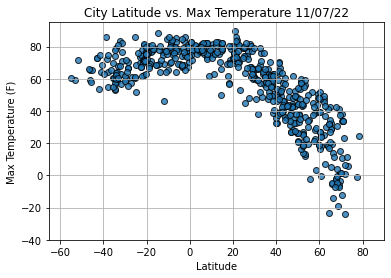

In [54]:
# Inport time module
import time

# Build scatter plot for latitude vs.max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(-40,95)
plt.xlim(-65, 90)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()


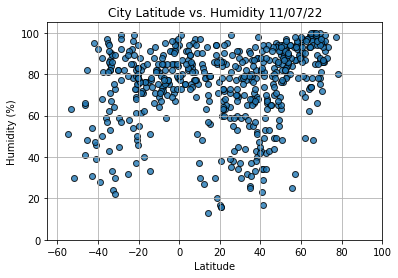

In [55]:
# Import time module
import time

# Build scatter plot for latitude vs.max temp

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(0,105)
plt.xlim(-65, 100)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

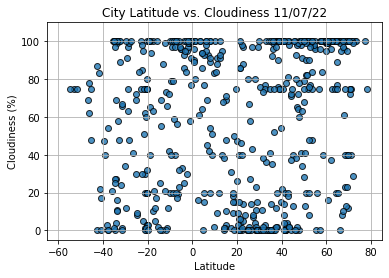

In [56]:
# Import time module
import time

# Build scatter plot for latitude vs.max temp
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(-5,110)
plt.xlim(-65, 85)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

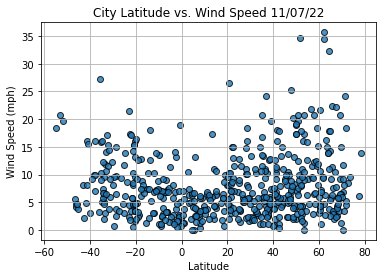

In [57]:
# Import time module
import time

# Build scatter plot for latitude vs.max temp
plt.scatter(lats, wind_speed,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

In [63]:
from scipy.stats import linregress
x_values=lats
y_values=max_temps

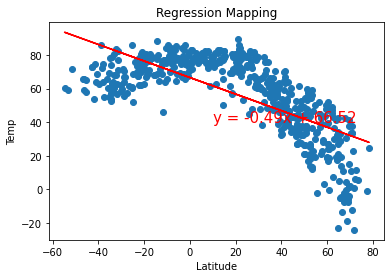

In [65]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values= x_values*slope+intercept

# Get the equation of the line.
line_eq="y = "+str(round(slope,2))+ "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title('Regression Mapping of Latitude vs Temp')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [67]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, u_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [69]:
index13 = city_data_df.loc[13]
index13

City                     Ust-Nera
Lat                       64.5667
Lng                         143.2
Max Temp                   -23.33
Humidity                       99
Cloudiness                     77
Wind Speed                   3.71
Country                        RU
Date          2022-11-07 23:46:30
Name: 13, dtype: object

In [70]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
541     True
542     True
543     True
544     True
545     True
Name: Lat, Length: 546, dtype: bool

In [72]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Orel-Izumrud,43.4583,39.9244,46.42,66,100,13.42,RU,2022-11-07 23:46:26
2,Syracuse,37.0881,15.2792,60.39,71,1,4.34,IT,2022-11-07 23:46:26
3,Ribeira Grande,38.5167,-28.7000,62.78,69,100,5.99,PT,2022-11-07 23:46:27
4,Jamestown,42.0970,-79.2353,49.59,59,0,5.75,US,2022-11-07 23:44:42
5,Clyde River,70.4692,-68.5914,10.63,72,75,0.00,CA,2022-11-07 23:46:27


In [73]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

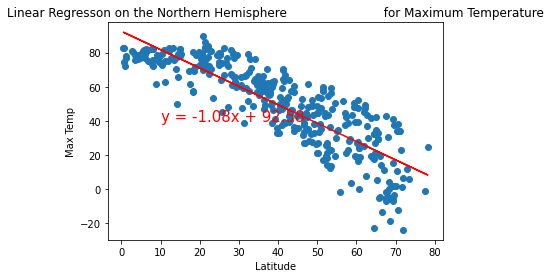

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere  \
                       for Maximum Temperature', 'Max Temp',(10,40))

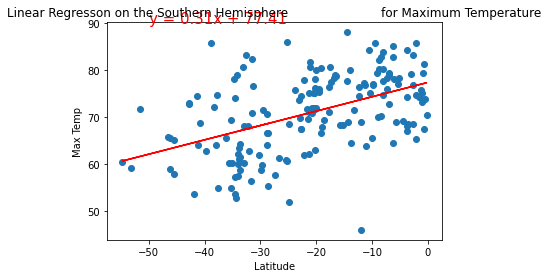

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

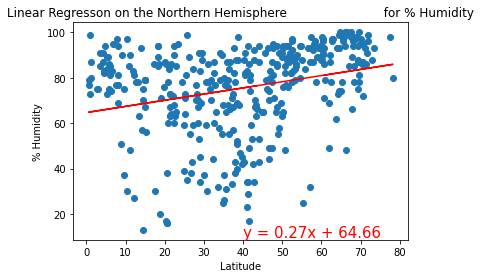

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere  \
                       for % Humidity', '% Humidity',(40,10))

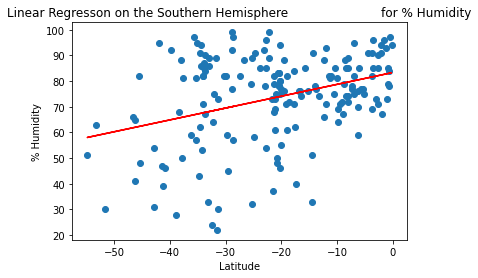

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

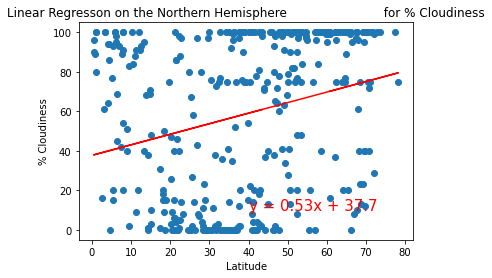

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere  \
                       for % Cloudiness', '% Cloudiness',(40,10))

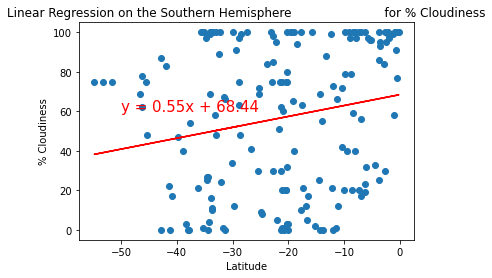

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,60))

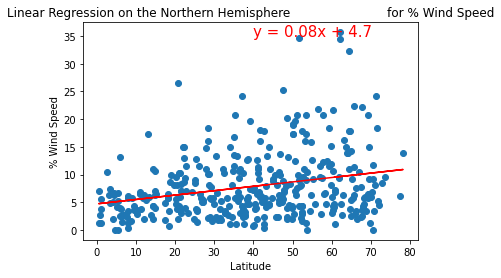

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere  \
                       for % Wind Speed', '% Wind Speed',(40,35))

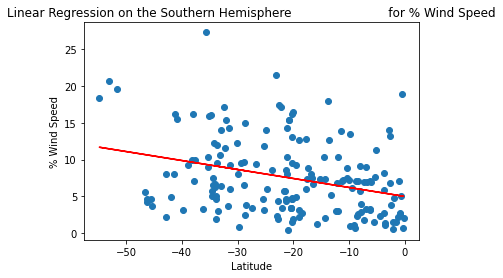

In [97]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere  \
                       for % Wind Speed', '% Wind Speed',(-50,35))

In [99]:
conda install -c conda-forge gmaps

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\bobbi\anaconda3

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39hcbf5309_2         985 KB  conda-forge
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geojson-2.5.0-py_0 None
  gmaps              conda-forge/noarch::gmaps-0.9.0-py_0 None
  python_abi         c

In [100]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.


In [101]:
jupyter nbextension enable --py --sys-prefix gmaps

SyntaxError: invalid syntax (1545296744.py, line 1)